<a href="https://colab.research.google.com/github/HimanshuSahoo/Himanshu_Python/blob/main/Neural_Network_Assignment_1_Forestfires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("forestfires.csv")

In [3]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [4]:
#changing size_category to numerical data
df['size_category'].unique()

array(['small', 'large'], dtype=object)

In [5]:
df.size_category.replace(('small','large'),(1,2),inplace=True)

In [6]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [7]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,1.268859
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,0.443796
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [9]:
#we can see that there are no missing values
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [10]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [11]:
#dropping month and day column as they are alrady seperatly given in the data 
df1 = df.drop(['month','day'],axis=1)
df1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [12]:
#removing duplicates
df1[df1.duplicated()].shape

(8, 29)

In [13]:
df1[df1.duplicated()]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
100,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
215,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
303,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
426,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
461,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
501,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
508,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [14]:
df2=df1.drop_duplicates()

In [15]:
df2[df2.duplicated()].shape

(0, 29)

In [16]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
array = df2.values
X = array[:, 0:28]
Y = array[:, 28]

In [18]:
model = Sequential()
model.add(Dense(30, input_dim=28,  activation='relu'))
model.add(Dense(15,  activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
history = model.fit(X, Y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 1s 7ms/step - loss: 0.3684 - accuracy: 0.5777 - val_loss: -28.4133 - val_accuracy: 0.6726
Epoch 2/250
35/35 [==============================] - 0s 2ms/step - loss: -28.5904 - accuracy: 0.7566 - val_loss: -60.5722 - val_accuracy: 0.6726
Epoch 3/250
35/35 [==============================] - 0s 2ms/step - loss: -56.1025 - accuracy: 0.7566 - val_loss: -121.8435 - val_accuracy: 0.6726
Epoch 4/250
35/35 [==============================] - 0s 2ms/step - loss: -113.6209 - accuracy: 0.7566 - val_loss: -236.3336 - val_accuracy: 0.6726
Epoch 5/250
35/35 [==============================] - 0s 3ms/step - loss: -202.9010 - accuracy: 0.7566 - val_loss: -429.4892 - val_accuracy: 0.6726
Epoch 6/250
35/35 [==============================] - 0s 2ms/step - loss: -358.1546 - accuracy: 0.7566 - val_loss: -737.7955 - val_accuracy: 0.6726
Epoch 7/250
35/35 [==============================] - 0s 2ms/step - loss: -605.0201 - accuracy: 0.7566 - val_loss: -1206.8951 

In [21]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

16/16 [==============================] - 0s 1ms/step - loss: -30994518.0000 - accuracy: 0.7289
accuracy: 72.89%


In [22]:
model.metrics_names

['loss', 'accuracy']

In [23]:
model.history.history.keys()

dict_keys([])

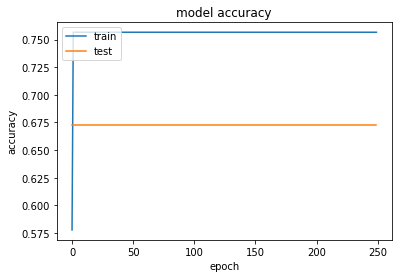

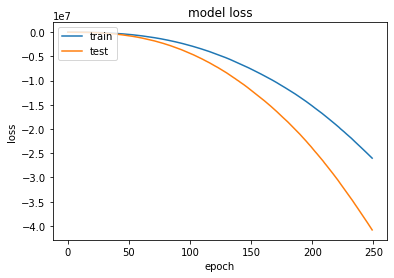

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
Array = df2.values
X = Array[:, 0:28]
Y = Array[:, 28]

In [26]:
# Standardization
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [27]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
count,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02,5.090000e+02
mean,-1.096700e-15,-7.852265e-18,-1.483206e-17,-8.986481e-17,1.832195e-16,1.797296e-16,2.225899e-16,-2.883526e-16,-4.765889e-17,-2.835540e-18,1.395958e-17,-7.939512e-17,1.494112e-16,-1.070962e-16,-9.248223e-17,1.317436e-16,-1.007707e-16,-4.427805e-16,-4.740805e-16,1.013160e-16,-1.374146e-17,3.177986e-16,-3.446272e-17,3.167080e-16,-1.374146e-17,4.606662e-16,7.877349e-16,2.791916e-16
std,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00,1.000984e+00
min,-1.295805e+01,-1.712164e+00,-2.177385e+00,-1.969965e+00,-2.855946e+00,-1.789299e+00,-2.007272e+00,-6.903477e-02,-2.027913e-01,-4.414019e-01,-4.124499e-01,-4.382208e-01,-4.759265e-01,-3.655548e-01,-3.758399e-01,-3.409224e-01,-1.341641e-01,-7.333242e-01,-1.341641e-01,-2.022370e-01,-6.280743e-02,-2.590096e-01,-1.801509e-01,-3.409224e-01,-6.280743e-02,-4.436783e-02,-1.742538e-01,-7.144129e-01
25%,-7.532785e-02,-7.520348e-01,-4.439871e-01,-5.727610e-01,-5.938679e-01,-7.494866e-01,-7.288945e-01,-6.903477e-02,-2.027913e-01,-4.414019e-01,-4.124499e-01,-4.382208e-01,-4.759265e-01,-3.655548e-01,-3.758399e-01,-3.409224e-01,-1.341641e-01,-7.333242e-01,-1.341641e-01,-2.022370e-01,-6.280743e-02,-2.590096e-01,-1.801509e-01,-3.409224e-01,-6.280743e-02,-4.436783e-02,-1.742538e-01,-7.144129e-01
50%,1.769213e-01,-3.036890e-02,4.694951e-01,-1.361347e-01,7.447337e-02,-1.378325e-01,-6.333465e-03,-6.903477e-02,-1.932706e-01,-4.414019e-01,-4.124499e-01,-4.382208e-01,-4.759265e-01,-3.655548e-01,-3.758399e-01,-3.409224e-01,-1.341641e-01,-7.333242e-01,-1.341641e-01,-2.022370e-01,-6.280743e-02,-2.590096e-01,-1.801509e-01,-3.409224e-01,-6.280743e-02,-4.436783e-02,-1.742538e-01,-7.144129e-01
75%,4.111527e-01,4.873480e-01,6.699368e-01,4.314794e-01,6.742668e-01,5.349871e-01,4.939011e-01,-6.903477e-02,-1.000917e-01,-4.414019e-01,-4.124499e-01,-4.382208e-01,-4.759265e-01,-3.655548e-01,-3.758399e-01,-3.409224e-01,-1.341641e-01,1.363653e+00,-1.341641e-01,-2.022370e-01,-6.280743e-02,-2.590096e-01,-1.801509e-01,-3.409224e-01,-6.280743e-02,-4.436783e-02,-1.742538e-01,1.399751e+00
max,1.005740e+00,2.840606e+00,1.261583e+00,1.027740e+01,2.473647e+00,3.409762e+00,2.995074e+00,2.155478e+01,1.682288e+01,2.265509e+00,2.424537e+00,2.281955e+00,2.101165e+00,2.735568e+00,2.660708e+00,2.933219e+00,7.453560e+00,1.363653e+00,7.453560e+00,4.944694e+00,1.592168e+01,3.860861e+00,5.550901e+00,2.933219e+00,1.592168e+01,2.253886e+01,5.738757e+00,1.399751e+00


# Tuning of Hyperparameters :- Batch Size and Epochs

In [28]:
from sklearn.model_selection import GridSearchCV, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [29]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=28, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [30]:
model = KerasClassifier(build_fn = create_model,verbose = 0)
batch_size = [10,20,40]
epochs = [10,50,100,150]
param_grid = dict(batch_size = batch_size,epochs = epochs)
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ............ batch_size=10, epochs=10, score=1.000, total=   1.3s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.824, total=   1.3s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.814, total=   1.0s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.863, total=   1.3s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.9s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.881, total=   1.2s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.1s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=1.000, total=   3.2s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.3s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.824, total=   2.5s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   11.8s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.902, total=   2.6s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   14.3s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.931, total=   3.2s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   17.5s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.901, total=   3.4s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.980, total=   5.7s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.853, total=   5.7s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.902, total=   5.7s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.892, total=   5.7s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.901, total=   4.5s
[CV] batch_size=10, epochs=150 .......................................
[CV] ........... batch_size=10, epochs=150, score=1.000, total=   6.5s
[CV] batch_size=10, epochs=150 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  2.8min finished


In [31]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9154727220535278, using {'batch_size': 40, 'epochs': 50}
0.8762376189231873,0.0666477376170472 with: {'batch_size': 10, 'epochs': 10}
0.9115705728530884,0.05686372964697654 with: {'batch_size': 10, 'epochs': 50}
0.905688214302063,0.04142944662030226 with: {'batch_size': 10, 'epochs': 100}
0.9115511417388916,0.04771704321408688 with: {'batch_size': 10, 'epochs': 150}
0.823238205909729,0.10677965489851961 with: {'batch_size': 20, 'epochs': 10}
0.9076101541519165,0.04995752856315 with: {'batch_size': 20, 'epochs': 50}
0.9036691784858704,0.051810185987564296 with: {'batch_size': 20, 'epochs': 100}
0.9134925127029419,0.04547407669796956 with: {'batch_size': 20, 'epochs': 150}
0.7858862400054931,0.11895663691088022 with: {'batch_size': 40, 'epochs': 10}
0.9154727220535278,0.04289868683021893 with: {'batch_size': 40, 'epochs': 50}
0.9095709323883057,0.04239028611197393 with: {'batch_size': 40, 'epochs': 100}
0.9115705609321594,0.0468553385801888 with: {'batch_size': 40, 'epochs': 150

# Tuning of Hyperparameters:- Learning rate and Drop out rate

In [32]:
from tensorflow.keras.layers import Dropout

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(12,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.941, total=   1.2s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.765, total=   1.2s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.647, total=   1.3s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.784, total=   1.3s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.0s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.782, total=   1.3s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.3s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=1.000, total=   1.3s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.5s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.863, total=   1.2s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    8.8s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.843, total=   1.5s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   10.3s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.922, total=   1.2s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   11.5s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.911, total=   1.3s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.863, total=   1.2s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.833, total=   1.2s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.814, total=   1.2s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.863, total=   1.2s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.871, total=   1.2s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV]  dropout_rate=0.1, learning_rate=0.001, score=0.971, total=   1.3s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV] 

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   58.2s finished


In [33]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9155309557914734, using {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7838866353034973,0.0936300587843167 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9076684236526489,0.05460969971160176 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.8487672209739685,0.0217441373571461 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7858862400054931,0.10560223570789992 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9155309557914734,0.03427448957857245 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.8389827132225036,0.0696238122328201 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7798679947853089,0.11363386794755997 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9154921412467957,0.043731436643900015 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.8092020869255065,0.10192271488780032 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


# Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [34]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(12,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)

activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

param_grids = dict(activation_function = activation_function,init = init)

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV]  activation_function=softmax, init=uniform, score=1.000, total=   2.0s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.765, total=   2.0s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.510, total=   2.0s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.9s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.676, total=   1.3s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.2s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.693, total=   1.3s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.5s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=1.000, total=   1.3s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.8s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.765, total=   1.3s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   11.1s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.510, total=   1.3s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   12.5s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.676, total=   1.6s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   14.1s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.693, total=   1.3s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=1.000, total=   1.3s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.765, total=   1.3s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.510, total=   1.3s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.676, total=   1.9s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.693, total=   1.9s
[CV] activation_function=relu, init=uniform ..........................
[CV]  activation_function=relu, init=uniform, score=1.000, total=   1.2s
[CV] activation_function=relu, init=uniform .................

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.4min finished


In [35]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8644534826278687, using {'activation_function': 'tanh', 'init': 'uniform'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'softmax', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'softmax', 'init': 'zero'}
0.7936517238616944,0.10608829891863436 with: {'activation_function': 'relu', 'init': 'uniform'}
0.7543972134590149,0.15217047996216865 with: {'activation_function': 'relu', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'relu', 'init': 'zero'}
0.8644534826278687,0.07077959927643684 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.8545913338661194,0.07378389631162245 with: {'activation_function': 'tanh', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'tanh', 'init': 'zero'}
0.8624927043914795,0.06956720016572787 with: {'activation_functio

# Tuning of Hyperparameter :-Number of Neurons in activation layer

In [36]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)

neuron1 = [4,8,16]
neuron2 = [2,4,8]

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV] ................ neuron1=4, neuron2=2, score=0.971, total=   1.3s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.765, total=   2.3s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.696, total=   1.3s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.9s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.716, total=   1.3s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.2s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.733, total=   1.2s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.4s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.990, total=   1.3s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.7s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.765, total=   1.3s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   10.0s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.716, total=   1.3s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   11.3s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.716, total=   1.3s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   12.6s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.752, total=   1.3s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.971, total=   1.3s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.765, total=   1.6s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.716, total=   1.3s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.765, total=   1.3s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.772, total=   1.3s
[CV] neuron1=8, neuron2=2 ............................................
[CV] ................ neuron1=8, neuron2=2, score=0.990, total=   1.3s
[CV] neuron1=8, neuron2=2 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.1min finished


In [37]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8683944821357727, using {'neuron1': 16, 'neuron2': 8}
0.7759464144706726,0.09989446719121069 with: {'neuron1': 4, 'neuron2': 2}
0.7877499461174011,0.10309811393586134 with: {'neuron1': 4, 'neuron2': 4}
0.7975926995277405,0.08881448822434385 with: {'neuron1': 4, 'neuron2': 8}
0.7995340704917908,0.09635373894211088 with: {'neuron1': 8, 'neuron2': 2}
0.8349640846252442,0.0807131153798453 with: {'neuron1': 8, 'neuron2': 4}
0.8468064308166504,0.07874250567935916 with: {'neuron1': 8, 'neuron2': 8}
0.8271403551101685,0.0868865363862206 with: {'neuron1': 16, 'neuron2': 2}
0.8428266167640686,0.07694923599359135 with: {'neuron1': 16, 'neuron2': 4}
0.8683944821357727,0.06604067531895626 with: {'neuron1': 16, 'neuron2': 8}


In [38]:
from sklearn.metrics import classification_report, accuracy_score

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 28,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 56,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

model.fit(X_standardized,Y)

y_predict = model.predict(X_standardized)

print(accuracy_score(Y,y_predict))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


0.7760314341846758


so from the accuracy we can tell that about 77% of the area is burnt